In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import torch
from torch.nn import Sequential
from wordcloud import wordcloud

In [11]:
from collections import Counter,defaultdict
import string
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,ConfusionMatrixDisplay,accuracy_score
from tabulate import tabulate
from tqdm import tqdm

In [3]:
train_1=pd.read_csv("train_v2_drcat_02.csv")
train_2=pd.read_csv("train_essays.csv")

In [4]:
train_1.head()

,text,label,prompt_name,source,RDizzl3_seven
0,Phones\n\nModern humans today are always on th...,0,Phones and driving,persuade_corpus,False
1,This essay will explain if drivers should or s...,0,Phones and driving,persuade_corpus,False
2,Driving while the use of cellular devices\n\nT...,0,Phones and driving,persuade_corpus,False
3,Phones & Driving\n\nDrivers should not be able...,0,Phones and driving,persuade_corpus,False
4,Cell Phone Operation While Driving\n\nThe abil...,0,Phones and driving,persuade_corpus,False


In [5]:
train_2.head()

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0


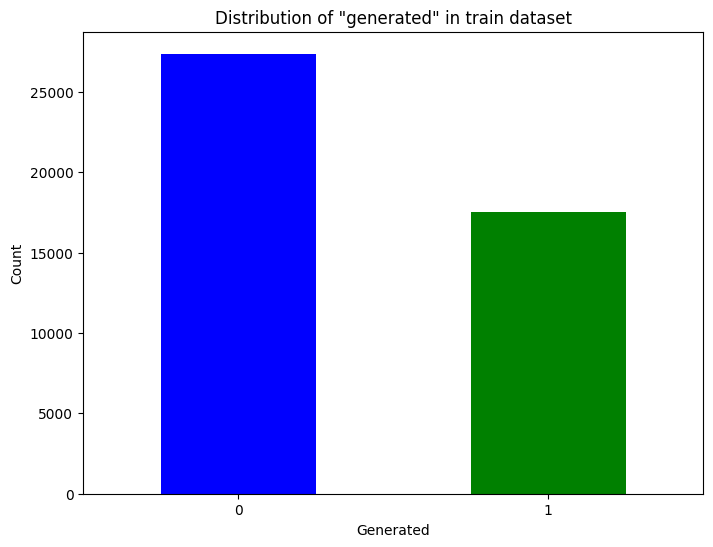

In [6]:
plt.figure(figsize=(8, 6))
train_1['label'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of "generated" in train dataset')
plt.xlabel('Generated')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

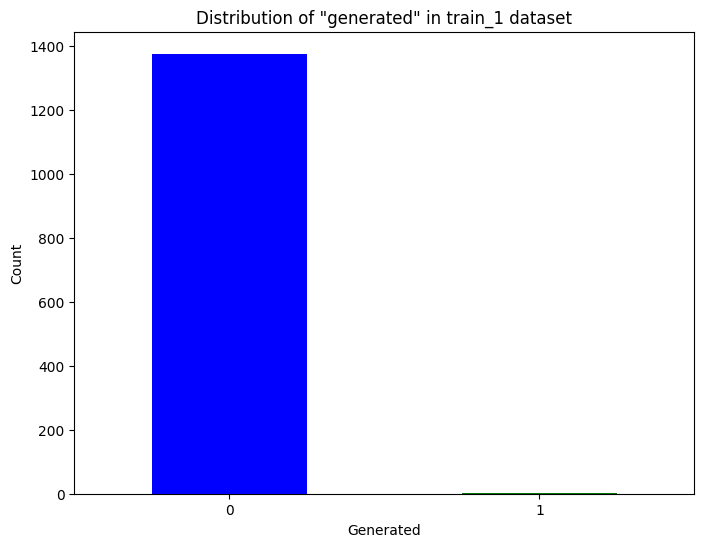

In [7]:
plt.figure(figsize=(8, 6))
train_2['generated'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of "generated" in train_1 dataset')
plt.xlabel('Generated')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [8]:
import pandas as pd

train_1_selected = train_1[['text', 'label']].copy()

train_2_selected = train_2[['text', 'generated']].rename(columns={'generated': 'label'}).copy()

combined_data = pd.concat([train_1_selected, train_2_selected], ignore_index=True)

print(combined_data)

                                                    text  label
0      Phones\n\nModern humans today are always on th...      0
1      This essay will explain if drivers should or s...      0
2      Driving while the use of cellular devices\n\nT...      0
3      Phones & Driving\n\nDrivers should not be able...      0
4      Cell Phone Operation While Driving\n\nThe abil...      0
...                                                  ...    ...
46241  There has been a fuss about the Elector Colleg...      0
46242  Limiting car usage has many advantages. Such a...      0
46243  There's a new trend that has been developing f...      0
46244  As we all know cars are a big part of our soci...      0
46245  Cars have been around since the 1800's and hav...      0

[46246 rows x 2 columns]


In [9]:
combined_data.head()

,text,label
0,Phones\n\nModern humans today are always on th...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices\n\nT...,0
3,Phones & Driving\n\nDrivers should not be able...,0
4,Cell Phone Operation While Driving\n\nThe abil...,0


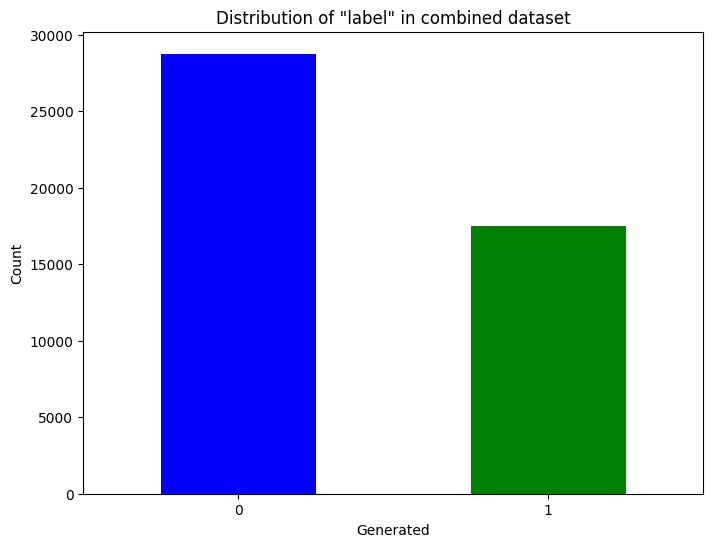

In [10]:
plt.figure(figsize=(8, 6))
combined_data['label'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of "label" in combined dataset')
plt.xlabel('Generated')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [11]:
student_data = pd.read_csv("train_student_essays.csv")

In [12]:
student_data.drop("essay_id",axis = 1,inplace = True)

In [13]:
student_data.head()

,full_text,score
0,Many people have car where they live. The thin...,3
1,I am a scientist at NASA that is discussing th...,3
2,People always wish they had the same technolog...,4
3,"We all heard about Venus, the planet without a...",4
4,"Dear, State Senator\n\nThis is a letter to arg...",3


In [14]:
temporary_student_data = student_data.query("score>=3").reset_index(drop = True)

In [15]:
temporary_student_data.shape

(11332, 2)

In [16]:
student_data.shape

(17307, 2)

In [17]:
temporary_student_data["label"] = 1

In [18]:
temporary_student_data = temporary_student_data.rename(columns = {"full_text":"text"}).drop("score",axis = 1)

In [19]:
temporary_student_data

,text,label
0,Many people have car where they live. The thin...,1
1,I am a scientist at NASA that is discussing th...,1
2,People always wish they had the same technolog...,1
3,"We all heard about Venus, the planet without a...",1
4,"Dear, State Senator\n\nThis is a letter to arg...",1
...,...,...
11327,"In the story ""The Challenge of Exploring Venus...",1
11328,You should join the Seagoing Cowboys because y...,1
11329,"Venus, an extraordinary planet because of many...",1
11330,Becoming a Seagoing Cowboy is a once in a life...,1


In [20]:
combined_data_2=pd.concat([combined_data,temporary_student_data],ignore_index=True)

In [21]:
combined_data_2

,text,label
0,Phones\n\nModern humans today are always on th...,0
1,This essay will explain if drivers should or s...,0
2,Driving while the use of cellular devices\n\nT...,0
3,Phones & Driving\n\nDrivers should not be able...,0
4,Cell Phone Operation While Driving\n\nThe abil...,0
...,...,...
57573,"In the story ""The Challenge of Exploring Venus...",1
57574,You should join the Seagoing Cowboys because y...,1
57575,"Venus, an extraordinary planet because of many...",1
57576,Becoming a Seagoing Cowboy is a once in a life...,1


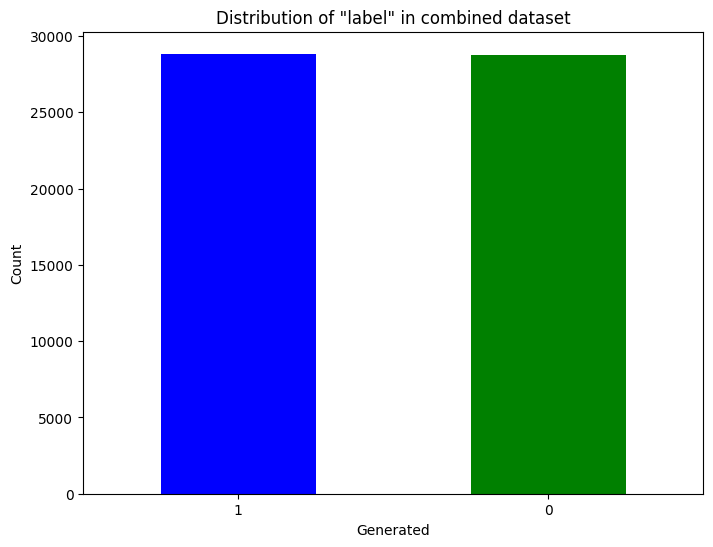

In [22]:
plt.figure(figsize=(8, 6))
combined_data_2['label'].value_counts().plot(kind='bar', color=['blue', 'green'])
plt.title('Distribution of "label" in combined dataset')
plt.xlabel('Generated')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [23]:
import spacy

In [24]:
nlp = spacy.load("en_core_web_sm")

In [25]:
print(combined_data_2["text"][10])

explain if drivers should or should not be able to use cell phones in any capacity while operating a vehicle

Drivers shouldn't be able to use their phones when driving because they can be severely injured or worse die. The number of crashes related to a phone and texting have made the use of a phone while driving illegal. Also the non use of a cell phone behind the wheel saves countless lives everyday.

Some states have also enacted laws to ban cell phone use. In the United States risk of automobile crash resulting in hospitalization is four times higher than if they weren't on their phone.

Driving with a cell phone has been the main cause of vehicle crashes over the last decade. Which led to most states banning the use of the device completely. However One out of every four automobile crashes in the United States are caused by texting and driving. Strong evidence that both retrieving and, in particular, sending text messages has a detrimental effect on that individual that increases

In [26]:
print(combined_data["text"][10000])

In this article " Making Mona Lisa Smile", this article tells us about how many emotions we have and how to identify them. In futuristic terms their has been a new software created to identify human emotion by just scanning facial expressions. The software is called FACD ( Facial Action Coding System) and from the paragraph it seems that it has various promising applications and for different industries. In my own opinion, I do believe that this technology is very valuable in so many different ways.

The reason why I suppport the claim of this technology being valuable is because, we can detect when something is wrong with a child or anyone for that matter. As it states in paragraph 1 " She's 83 percent happy, 9 percent disgusted, 6 percent fearful, and 2 percent angry".

This software has a remarkable way of just identifying your emotions and putting it into percentages.

So say if a child is depressed this software can give us the information we need to see what we can do to help a c

In [27]:
def countCapitalWords(sentence:str):
    return sum(1 for word in sentence.split(" ") if word and (64< ord(word[0]) < 91))

def countCapitalLetters(sentence:str):
    return sum(1 for word in sentence.split(" ") for ch in word if 'A' <= ch <= 'Z')

def countPunctuations(sentence:str):
    punctuation = set(string.punctuation)
    return sum(1 for word in sentence.split(" ") for ch in word if ch in punctuation)

def countWords(sentence:str):
    return len(sentence.split(" "))

In [28]:
def extract_pos(combined_df):
    pos_tags = {
        "ADJ": [],
        "ADP": [],
        "ADV": [],
        "AUX": [],
        "CCONJ": [],
        "DET": [],
        "INTJ": [],
        "NOUN": [],
        "NUM": [],
        "PART": [],
        "PRON": [],
        "PROPN": [],
        "PUNCT": [],
        "SCONJ": [],
        "SYM": [],
        "VERB": [],
    }

    def posExtractor(sentence):
        hashmap = Counter([word.pos_ for word in nlp(sentence)])
        for k in pos_tags.keys():
            if k in hashmap:
                pos_tags[k].append(hashmap[k])
            else:
                pos_tags[k].append(0)

    for sentence in tqdm(combined_df["text"]):
        posExtractor(sentence)
    return pos_tags

In [29]:
for k,v in extract_pos(combined_data_2).items():
    combined_data_2[k] = v

100%|██████████| 57578/57578 [46:31<00:00, 20.63it/s] 


In [31]:
%%time
combined_data_2["word_counts"] = combined_data_2["text"].apply(countWords)
combined_data_2["capital_words"] = combined_data_2["text"].apply(countCapitalWords)
combined_data_2["capital_letters"] = combined_data_2["text"].apply(countCapitalLetters)
combined_data_2["punctuations"] = combined_data_2["text"].apply(countPunctuations)

CPU times: total: 10.1 s
Wall time: 24.6 s


In [32]:
combined_data_2.head()

,text,label,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,...,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,word_counts,capital_words,capital_letters,punctuations
0,Phones\n\nModern humans today are always on th...,0,20,30,29,31,15,27,2,65,...,60,9,31,24,0,63,378,33,41,46
1,This essay will explain if drivers should or s...,0,20,37,23,38,14,32,0,78,...,39,0,42,21,0,54,432,16,20,49
2,Driving while the use of cellular devices\n\nT...,0,15,21,5,21,5,17,0,39,...,10,0,13,8,0,24,179,6,8,15
3,Phones & Driving\n\nDrivers should not be able...,0,16,17,9,20,5,18,0,48,...,20,5,21,11,0,29,221,15,24,26
4,Cell Phone Operation While Driving\n\nThe abil...,0,25,53,18,25,6,39,0,77,...,23,3,28,8,0,38,334,15,19,29


In [33]:
combined_data_2.to_csv("combined_data.csv", sep=',', index=False, encoding='utf-8')

In [34]:
temp = combined_data_2[combined_data_2.columns[1:]]

In [35]:
temp.columns

Index(['label', 'ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN',
       'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB',
       'word_counts', 'capital_words', 'capital_letters', 'punctuations'],
      dtype='object')

In [36]:
temp.corr()[:1]

,label,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,...,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,word_counts,capital_words,capital_letters,punctuations
label,1.0,0.025118,-0.113171,-0.161691,-0.220809,-0.012058,-0.138687,0.075328,-0.079034,-0.140284,...,-0.250732,-0.007986,0.053205,-0.259614,-0.065078,-0.209692,-0.133301,-0.037482,-0.048036,0.025298


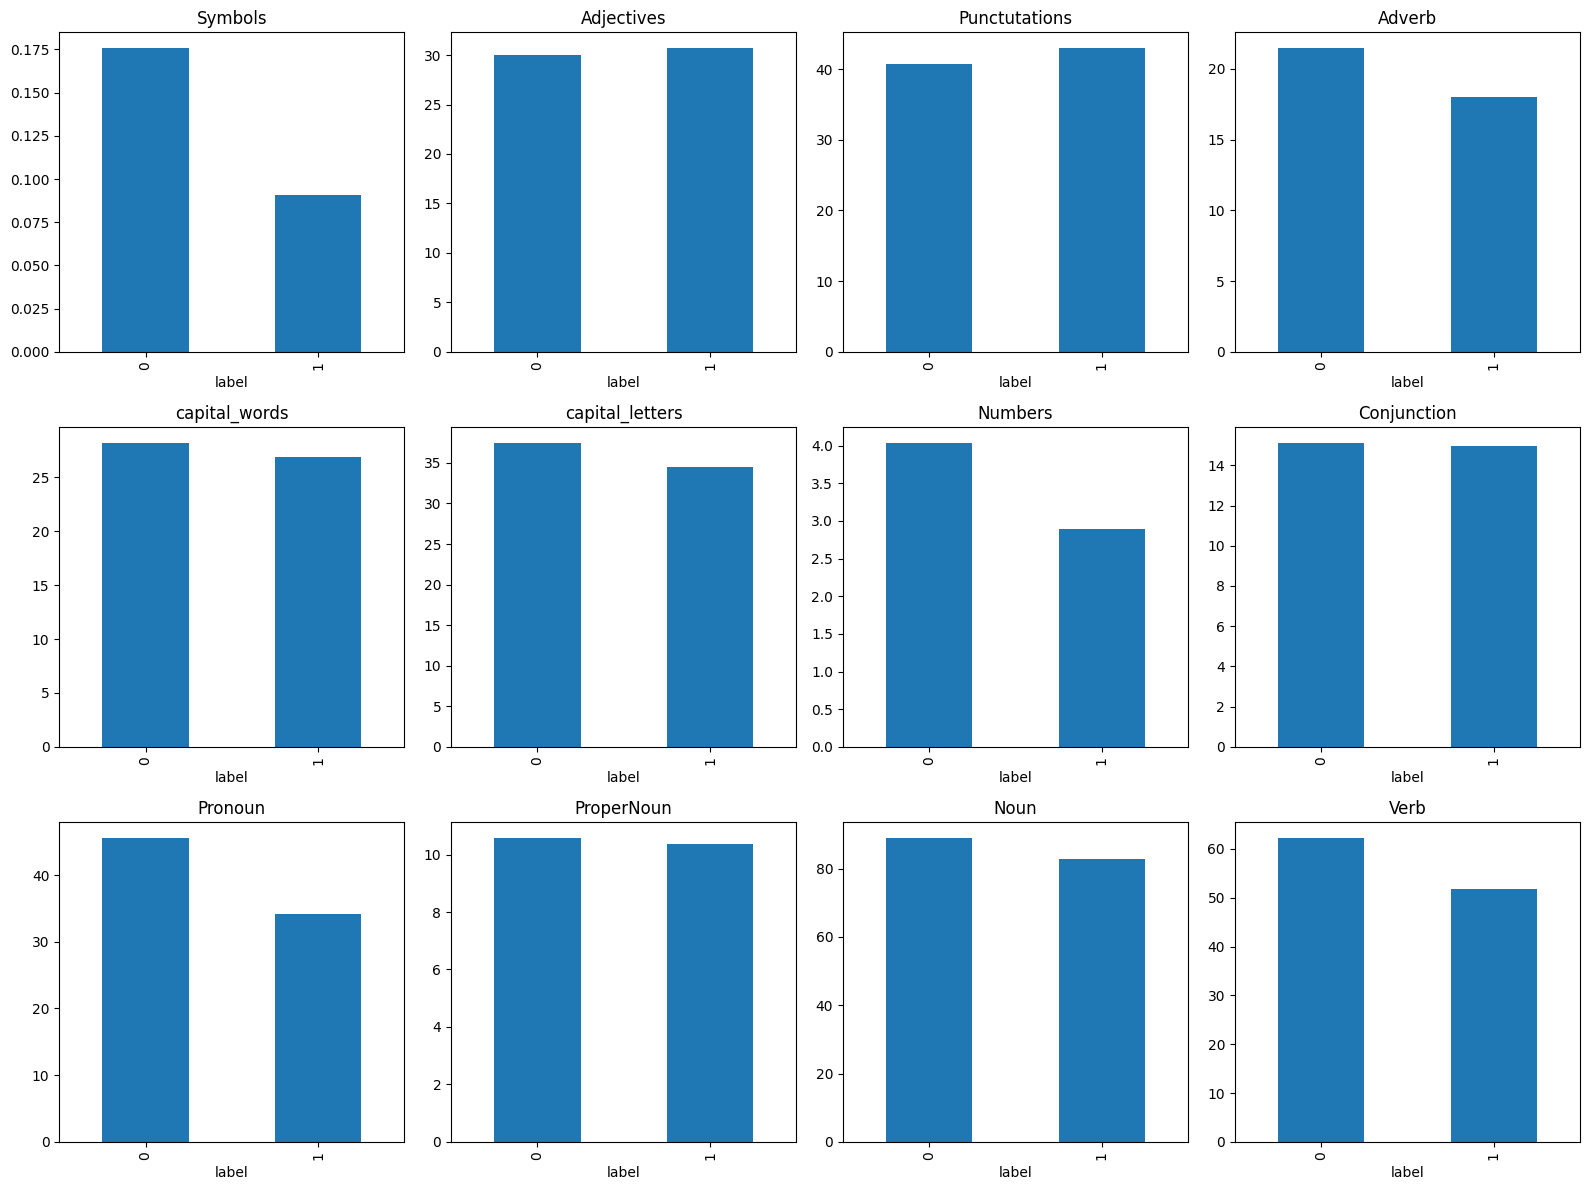

In [37]:
fig,ax = plt.subplots(3,4,figsize=(16,12))
temp.groupby("label")["SYM"].mean().plot(kind = "bar",title = "Symbols",ax = ax[0,0])
temp.groupby("label")["ADJ"].mean().plot(kind = "bar",title = "Adjectives", ax= ax[0,1])
temp.groupby("label")["PUNCT"].mean().plot(kind = "bar",title = "Punctutations",ax = ax[0,2])
temp.groupby("label")["ADV"].mean().plot(kind = "bar",title = "Adverb",ax = ax[0,3])
temp.groupby("label")["capital_words"].mean().plot(kind = "bar",title = "capital_words",ax = ax[1,0])
temp.groupby("label")["capital_letters"].mean().plot(kind = "bar",title = "capital_letters",ax = ax[1,1])
temp.groupby("label")["NUM"].mean().plot(kind = "bar",title = "Numbers",ax = ax[1,2])
temp.groupby("label")["CCONJ"].mean().plot(kind = "bar",title = "Conjunction",ax = ax[1,3])
temp.groupby("label")["PRON"].mean().plot(kind = "bar",title = "Pronoun",ax = ax[2,0])
temp.groupby("label")["PROPN"].mean().plot(kind = "bar",title = "ProperNoun",ax = ax[2,1])
temp.groupby("label")["NOUN"].mean().plot(kind = "bar",title = "Noun",ax = ax[2,2])
temp.groupby("label")["VERB"].mean().plot(kind = "bar",title = "Verb",ax = ax[2,3])

plt.tight_layout()
plt.show()

<Axes: title={'center': 'Avg. Word Count'}, xlabel='label'>

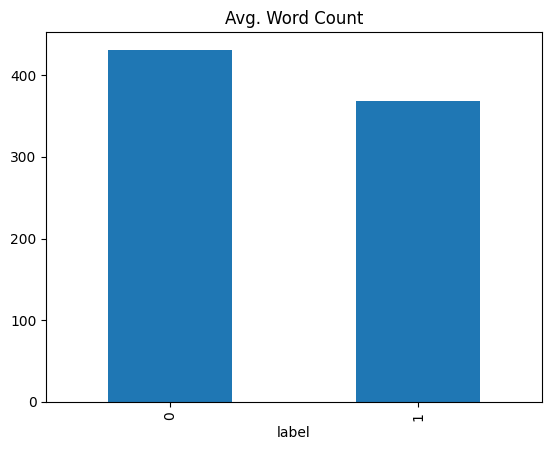

In [50]:
temp.groupby("label")["word_counts"].mean().plot(kind = "bar",title = "Avg. Word Count")

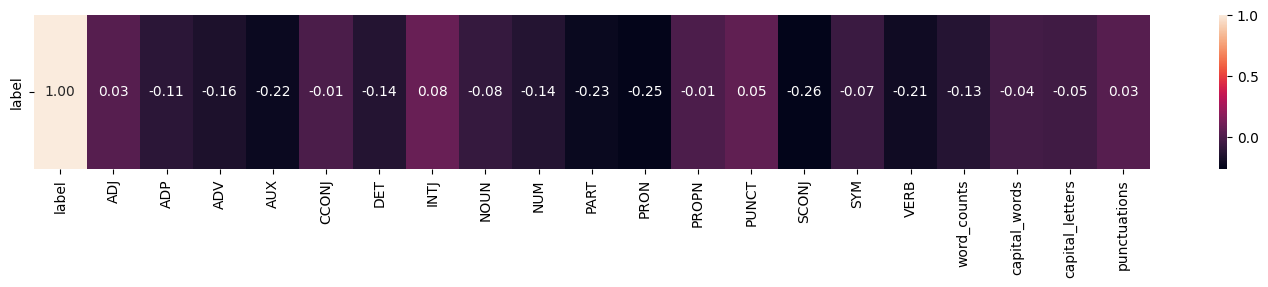

In [51]:
plt.figure(figsize = (18,2))
sns.heatmap(temp.corr()[:1],fmt=".2f",annot = True)
plt.show()

In [12]:
combined_df=pd.read_csv("combined_data.csv")

In [13]:
combined_df.shape

(57578, 22)

In [14]:
combined_df.head()

,text,label,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,...,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,word_counts,capital_words,capital_letters,punctuations
0,Phones\n\nModern humans today are always on th...,0,20,30,29,31,15,27,2,65,...,60,9,31,24,0,63,378,33,41,46
1,This essay will explain if drivers should or s...,0,20,37,23,38,14,32,0,78,...,39,0,42,21,0,54,432,16,20,49
2,Driving while the use of cellular devices\n\nT...,0,15,21,5,21,5,17,0,39,...,10,0,13,8,0,24,179,6,8,15
3,Phones & Driving\n\nDrivers should not be able...,0,16,17,9,20,5,18,0,48,...,20,5,21,11,0,29,221,15,24,26
4,Cell Phone Operation While Driving\n\nThe abil...,0,25,53,18,25,6,39,0,77,...,23,3,28,8,0,38,334,15,19,29


In [15]:
temp = combined_df[combined_df.columns[1:]]

In [16]:
temp.columns

Index(['label', 'ADJ', 'ADP', 'ADV', 'AUX', 'CCONJ', 'DET', 'INTJ', 'NOUN',
       'NUM', 'PART', 'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB',
       'word_counts', 'capital_words', 'capital_letters', 'punctuations'],
      dtype='object')

In [17]:
temp.corr()[:1]

,label,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,...,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,word_counts,capital_words,capital_letters,punctuations
label,1.0,0.025118,-0.113171,-0.161691,-0.220809,-0.012058,-0.138687,0.075328,-0.079034,-0.140284,...,-0.250732,-0.007986,0.053205,-0.259614,-0.065078,-0.209692,-0.133301,-0.037482,-0.048036,0.025298


In [49]:
X_train,X_test,y_train,y_test = train_test_split(temp[temp.columns[1:]],temp["label"],shuffle=True,random_state=42)

In [47]:
model = XGBClassifier(
    n_estimators = 350,
    eval_metric = "error",
    n_jobs = 4,
)

In [48]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, n_jobs=4,
              num_parallel_tree=None, random_state=None, ...)

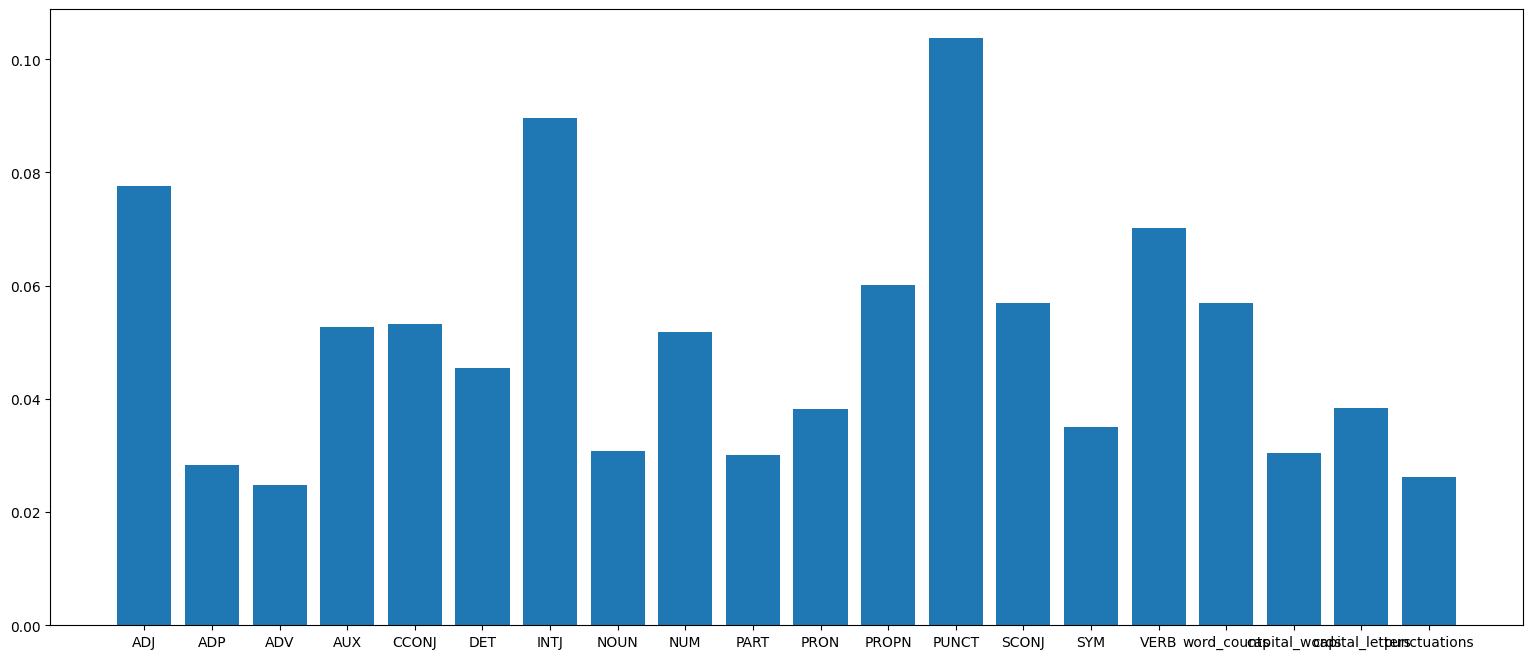

In [49]:
plt.figure(figsize = (19,8))
plt.bar(temp.columns[1:],model.feature_importances_)
plt.show()

In [50]:
y_pred = model.predict(X_test)

In [51]:
cm = confusion_matrix(y_test,y_pred)

In [52]:
disp = ConfusionMatrixDisplay(cm,display_labels=model.classes_)

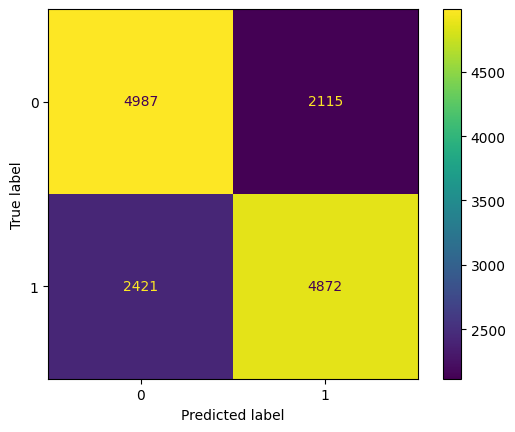

In [53]:
disp.plot()

In [54]:
report = classification_report(y_test,y_pred,output_dict=False)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.70      0.69      7102
           1       0.70      0.67      0.68      7293

    accuracy                           0.68     14395
   macro avg       0.69      0.69      0.68     14395
weighted avg       0.69      0.68      0.68     14395



In [55]:
accuracy_score(y_test,y_pred)

0.6848905870093782

## Hyper-Parameter Tuning

In [8]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [43]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 350,
        'seed': 0
    }

In [44]:
import xgboost as xgb

In [45]:
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']),eval_metric="error",n_jobs=4)
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation,
            verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [46]:
trials = Trials()
best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

SCORE:                                                 
0.7299756860020841                                     
SCORE:                                                                            
0.7356721083709621                                                                
SCORE:                                                                            
0.7388676623827718                                                                
SCORE:                                                                            
0.7299756860020841                                                                
SCORE:                                                                            
0.7381729767280306                                                                
SCORE:                                                                            
0.7403265022577283                                                                
SCORE:                                                    

In [47]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': np.float64(0.5005224678437536), 'gamma': np.float64(1.1351437593441311), 'max_depth': np.float64(17.0), 'min_child_weight': np.float64(1.0), 'reg_alpha': np.float64(47.0), 'reg_lambda': np.float64(0.9977460745077618)}


In [48]:
model = XGBClassifier(
        n_estimators =350, max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
        reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
        colsample_bytree=int(best_hyperparams['colsample_bytree']),eval_metric="error",n_jobs=4
)

In [50]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=0,
              device=None, early_stopping_rounds=None, enable_categorical=False,
              eval_metric='error', feature_types=None,
              gamma=np.float64(1.1351437593441311), grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=17,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=350,
              n_jobs=4, num_parallel_tree=None, random_state=None, ...)

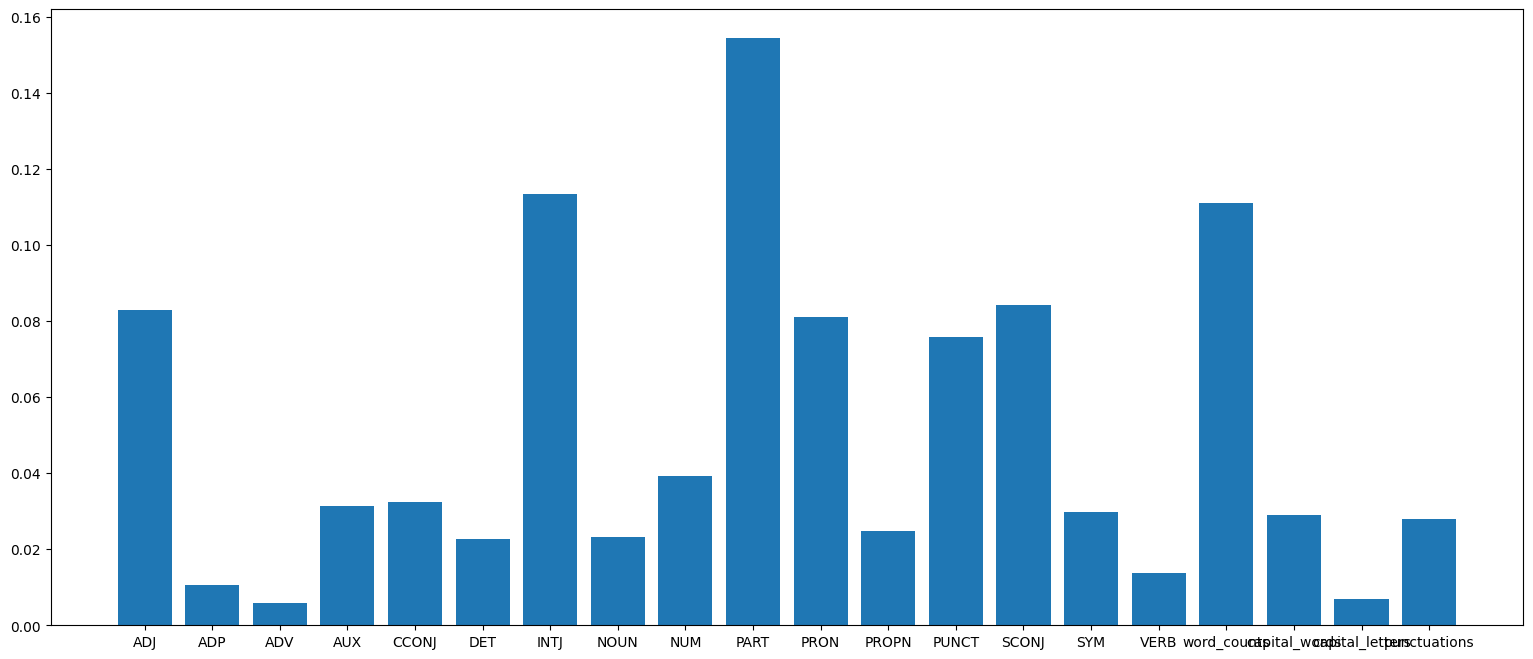

In [51]:
plt.figure(figsize = (19,8))
plt.bar(temp.columns[1:],model.feature_importances_)
plt.show()

In [52]:
y_pred = model.predict(X_test)

In [53]:
cm = confusion_matrix(y_test,y_pred)

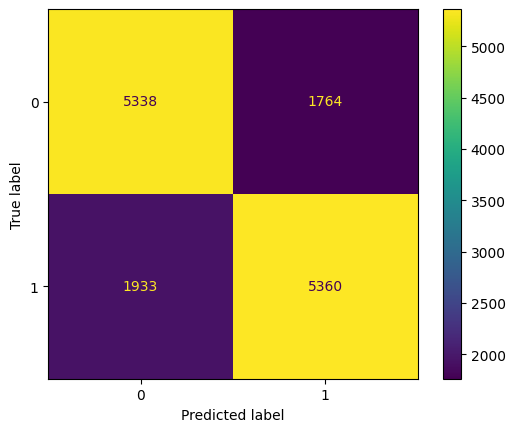

In [54]:
disp = ConfusionMatrixDisplay(cm,display_labels=model.classes_)
disp.plot()

In [55]:
report2 = classification_report(y_test,y_pred,output_dict=False)
print(report2)

              precision    recall  f1-score   support

           0       0.73      0.75      0.74      7102
           1       0.75      0.73      0.74      7293

    accuracy                           0.74     14395
   macro avg       0.74      0.74      0.74     14395
weighted avg       0.74      0.74      0.74     14395



In [56]:
accuracy_score(y_test,y_pred)

0.7431747134421675

## Using a different model

In [60]:
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier

In [205]:
sgd_model1 = SGDClassifier(max_iter=8000, tol=1e-4, loss="modified_huber",n_jobs=-1,random_state=42,
                           verbose=10,early_stopping=True,validation_fraction=0.1,class_weight="balanced")
xgb1= XGBClassifier(
        n_estimators =350, max_depth = int(best_hyperparams['max_depth']), gamma = best_hyperparams['gamma'],
        reg_alpha = int(best_hyperparams['reg_alpha']),min_child_weight=int(best_hyperparams['min_child_weight']),
        colsample_bytree=int(best_hyperparams['colsample_bytree']),eval_metric="error",n_jobs=4
)
parames={'n_iter': 300,'verbose': -1,'learning_rate': 0.005689066836106983,
         'colsample_bytree': 0.8915976762048253,
         'colsample_bynode': 0.5942203285139224, 'lambda_l1': 7.6277555139102864,
         'lambda_l2': 6.6591278779517808, 'min_data_in_leaf' : 156, 'max_depth': 11, 'max_bin': 813}
lgb=LGBMClassifier(**parames)

In [206]:
ensemble = VotingClassifier(
    estimators=[
        ('sgd1', sgd_model1),
        ('xgb1',xgb1),
        ('lgb', lgb)
    ],
    weights=[0.10,0.40,0.50],
    voting='soft',
    n_jobs=-1
)


In [207]:
ensemble.fit(X_train,y_train)

VotingClassifier(estimators=[('sgd1',
                              SGDClassifier(class_weight='balanced',
                                            early_stopping=True,
                                            loss='modified_huber',
                                            max_iter=8000, n_jobs=-1,
                                            random_state=42, tol=0.0001,
                                            verbose=10)),
                             ('xgb1',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0, device=None,
                                            early_stopping_rounds=None,...
                                            n_estimators=350, n_jobs=4,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgb',
                              LGBMClassifier(colsample_bynode=0.5942203285139224,
                                             colsample_bytree=0.8915976762048253,
                                             lambda_l1=7.627755513910286,
                                             lambda_l2=6.65912787795178,
                                             learning_rate=0.005689066836106983,
                                             max_bin=813, max_depth=11,
                                             min_data_in_leaf=156, n_iter=300,
                                             verbose=-1))],
                 n_jobs=-1, voting='soft', weights=[0.1, 0.4, 0.5])

In [208]:
y_pred2 = ensemble.predict(X_test)

In [209]:
cm = confusion_matrix(y_test,y_pred2)

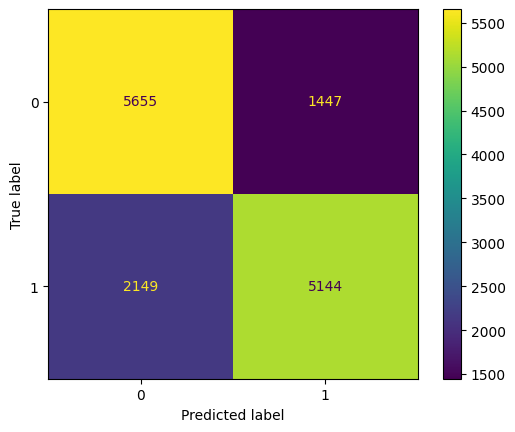

In [210]:
disp = ConfusionMatrixDisplay(cm,display_labels=ensemble.classes_)
disp.plot()

In [211]:
report2 = classification_report(y_test,y_pred2,output_dict=False)
print(report2)

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      7102
           1       0.78      0.71      0.74      7293

    accuracy                           0.75     14395
   macro avg       0.75      0.75      0.75     14395
weighted avg       0.75      0.75      0.75     14395



In [212]:
accuracy_score(y_test,y_pred2)

0.7501910385550539

### HyperParameter Tuning

In [214]:
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier

def objective(trial):
    #SGDClassifier parameters
    sgd_alpha = trial.suggest_float("sgd_alpha", 1e-5, 1e-1, log=True)
    sgd_max_iter = trial.suggest_int("sgd_max_iter", 1000, 10000, step=1000)
    
    # XGBClassifier parameters
    xgb_learning_rate = trial.suggest_float("xgb_learning_rate", 0.01, 0.3, log=True)
    xgb_max_depth = trial.suggest_int("xgb_max_depth", 3, 12)
    xgb_n_estimators = trial.suggest_int("xgb_n_estimators", 100, 1000, step=50)
    xgb_gamma = trial.suggest_float("xgb_gamma", 0, 5)
    xgb_colsample_bytree = trial.suggest_float("xgb_colsample_bytree", 0.5, 1.0)
    
    # LGBMClassifier parameters
    lgb_learning_rate = trial.suggest_float("lgb_learning_rate", 0.001, 0.1, log=True)
    lgb_max_depth = trial.suggest_int("lgb_max_depth", 3, 12)
    lgb_n_estimators = trial.suggest_int("lgb_n_estimators", 100, 1000, step=50)
    lgb_min_child_samples = trial.suggest_int("lgb_min_child_samples", 10, 200)
    
    # Voting weights for each model
    weight_sgd = trial.suggest_float("weight_sgd", 0.0, 1.0)
    weight_xgb = trial.suggest_float("weight_xgb", 0.0, 1.0)
    weight_lgb = trial.suggest_float("weight_lgb", 0.0, 1.0)

    sgd_model = SGDClassifier(
        alpha=sgd_alpha,
        max_iter=sgd_max_iter,
        tol=1e-4,
        loss="modified_huber",
        n_jobs=-1,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        class_weight="balanced"
    )

    xgb_model = XGBClassifier(
        learning_rate=xgb_learning_rate,
        max_depth=xgb_max_depth,
        n_estimators=xgb_n_estimators,
        gamma=xgb_gamma,
        colsample_bytree=xgb_colsample_bytree,
        eval_metric="error",
        n_jobs=4
    )

    lgb_model = LGBMClassifier(
        learning_rate=lgb_learning_rate,
        max_depth=lgb_max_depth,
        n_estimators=lgb_n_estimators,
        min_child_samples=lgb_min_child_samples
    )


    ensemble = VotingClassifier(
        estimators=[
            ('sgd', sgd_model),
            ('xgb', xgb_model),
            ('lgb', lgb_model)
        ],
        voting='soft',
        weights=[weight_sgd, weight_xgb, weight_lgb],
        n_jobs=-1
    )

  
    total_weight = weight_sgd + weight_xgb + weight_lgb
    if total_weight > 0:
        ensemble.weights = [weight / total_weight for weight in ensemble.weights]

    score = cross_val_score(ensemble, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1).mean()

    return score
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

c:\Users\Jaganath\anaconda3\envs\pytorch_cuda\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2024-10-16 21:51:09,932] A new study created in memory with name: no-name-5d9c2e7d-8d9c-4dff-9d7d-0c36cd842cc4
[I 2024-10-16 21:51:18,657] Trial 0 finished with value: 0.6106089986407135 and parameters: {'sgd_alpha': 0.003269911863889928, 'sgd_max_iter': 6000, 'xgb_learning_rate': 0.2786204321765993, 'xgb_max_depth': 11, 'xgb_n_estimators': 100, 'xgb_gamma': 2.369419429116784, 'xgb_colsample_bytree': 0.9235204236235461, 'lgb_learning_rate': 0.0024980109172308036, 'lgb_max_depth': 11, 'lgb_n_estimators': 550, 'lgb_min_child_samples': 119, 'weight_sgd': 0.7699638142088892, 'weight_xgb': 0.5050737874046665, 'weight_lgb': 0.07379463168745459}. Best is trial 0 with value: 0.6106089986407135.
[I 2024-10-16 21:51:27,683] Tria

In [215]:
print("Best parameters found: ", study.best_params)
print("Best cross-validation accuracy: ", study.best_value)

Best parameters found:  {'sgd_alpha': 0.0475587959883996, 'sgd_max_iter': 2000, 'xgb_learning_rate': 0.028599306383111624, 'xgb_max_depth': 12, 'xgb_n_estimators': 400, 'xgb_gamma': 4.732267355754056, 'xgb_colsample_bytree': 0.867798551040607, 'lgb_learning_rate': 0.006268269895263912, 'lgb_max_depth': 10, 'lgb_n_estimators': 950, 'lgb_min_child_samples': 17, 'weight_sgd': 0.0006032601336510152, 'weight_xgb': 0.0003313747254730622, 'weight_lgb': 0.5421312691323615}
Best cross-validation accuracy:  0.7549960817348029


In [234]:
best_params=study.best_params
sgd_model = SGDClassifier(
        alpha=best_params['sgd_alpha'],
        max_iter=best_params['sgd_max_iter'],
        tol=1e-4,
        loss="modified_huber",
        n_jobs=-1,
        random_state=42,
        early_stopping=True,
        validation_fraction=0.1,
        class_weight="balanced"
    )

xgb_model = XGBClassifier(
        learning_rate=best_params['xgb_learning_rate'],
        max_depth=best_params['xgb_max_depth'],
        n_estimators=best_params['xgb_n_estimators'],
        gamma=best_params['xgb_gamma'],
        colsample_bytree=best_params['xgb_colsample_bytree'],
        eval_metric="error",
        n_jobs=4
    )

lgb_model = LGBMClassifier(
        learning_rate=best_params['lgb_learning_rate'],
        max_depth=best_params['lgb_max_depth'],
        n_estimators=best_params['lgb_n_estimators'],
        min_child_samples=best_params['lgb_min_child_samples']
    )

In [235]:
ensemble = VotingClassifier(
    estimators=[
        ('sgd1', sgd_model),
        ('xgb1',xgb_model),
        ('lgb', lgb_model)
    ],
    weights=[best_params["weight_sgd"],best_params["weight_xgb"],best_params["weight_lgb"]],
    voting='soft',
    n_jobs=-1
)

In [236]:
ensemble.fit(X_train,y_train)

VotingClassifier(estimators=[('sgd1',
                              SGDClassifier(alpha=0.0475587959883996,
                                            class_weight='balanced',
                                            early_stopping=True,
                                            loss='modified_huber',
                                            max_iter=2000, n_jobs=-1,
                                            random_state=42, tol=0.0001)),
                             ('xgb1',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.867798551040607,
                                            device=No...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=400, n_jobs=4,
                                            num_parallel_tree=None,
                                            random_state=None, ...)),
                             ('lgb',
                              LGBMClassifier(learning_rate=0.006268269895263912,
                                             max_depth=10, min_child_samples=17,
                                             n_estimators=950))],
                 n_jobs=-1, voting='soft',
                 weights=[0.0006032601336510152, 0.0003313747254730622,
                          0.5421312691323615])

In [237]:
y_pred = ensemble.predict(X_test)

In [238]:
cm = confusion_matrix(y_test,y_pred2)

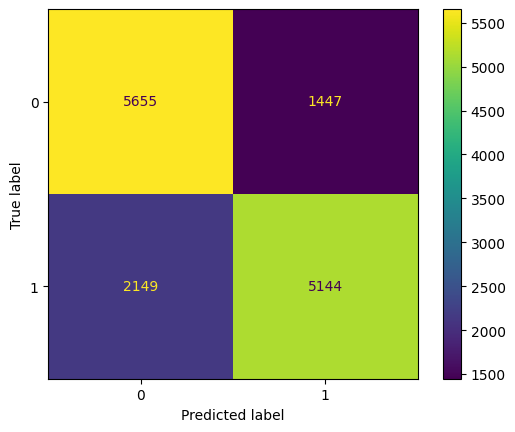

In [239]:
disp = ConfusionMatrixDisplay(cm,display_labels=ensemble.classes_)
disp.plot()

In [240]:
report = classification_report(y_test,y_pred,output_dict=False)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77      7102
           1       0.79      0.71      0.75      7293

    accuracy                           0.76     14395
   macro avg       0.76      0.76      0.76     14395
weighted avg       0.76      0.76      0.76     14395



In [241]:
accuracy_score(y_test,y_pred)

0.7560263980548801